### 5.1 Discrete Values

In the last module, we built a linear regression model to predict a continuous value, the median home value in Boston. In this module, we will work through classification problems whose task is to predict a discrete value.

Discrete data are only able to have certain values, while continuous data can take on any value.

Examples of classification problems involving discrete data values are:
• to predict whether a breast cancer is benign or malignant given a set of features
• to classify an image as containing cats or dogs or horses
• to predict whether an email is spam or not from a given email address

In each of the examples, the labels come in categorical form and represent a finite number of classes.

Discrete data values can be numeric, like the number of students in a class, or it can be categorical, like red, blue or yellow.

#### Binary and Multi-class Classification

There are two types of classification: binary and multi-class. If there are two classes to predict, that is a binary classification problem, for example, a benign or malignant tumor. When there are more than two classes, the task is a multi-classification problem. For example, classifying the species of iris, which can be versicolor, virqinica, or setosa, based on their sepal and petal characteristics.

Common algorithms for classification include logistic regression, k nearest neighbors, decision trees, naive bayes, support vector machines, neural networks, etc.  Here we will learn how to use k nearest neighbors to classify iris species.

Supervised learning problems are grouped into regression and classification problems. Both problems have as a goal the construction of a mapping function from input variables (X) to an output variable (y). The difference is that the output variable is continuous in regression and categorical for classification.

#### Iris Dataset

The famous iris database, first used by Sir R. A. Fisher, is perhaps the best known dataset to be found in pattern recognition literature. There are 150 iris plants, each with 4 numeric attributes: sepal length in cm, sepal width in cm, petal length in cm, and petal width in cm. The task is to predict each plant as an iris-setosa, an iris-versicolor, or an iris-virginica based on these attributes.




The dataset is stored in sklearn datasets

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

# create a dataframe of iris dataset

df = pd.DataFrame(iris.data,columns=iris.feature_names)

df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Summary Statistics

Check the summary statistics:


In [10]:
iris = df.copy()
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The ranges of attributes are still of similar magnitude, thus we will skip standardization. However, standardizing attributes such that each has a mean of zero and a standard deviation of one, can be an important preprocessing step for many machine learning algorithms. This is also called feature scaling; see importance of feature scaling for more details.

Feature scaling is very crucial if your features have different ranges.
Ex-Range of Feature 1- (2-50)
Range of Feature 2- (0.002-0.1)
Range of Feature 3- (1000-20000)

Then, make sure to either user StandardScaler() or RobustScaler() after train_test_split() before initializing and training your model. 

If feature scaling is not done, it will take a lot of time to find the optimized parameters for the model of your interest and the weight(slope of that feature) of the highest range feature(in this example - Feature 3) will be much more than that of other 2 features. So basically, your model will depend heavily on the value of Feature 3, and negligible dependence on the values of Feature 1 and 2 will be seen. This will lead to skewed predictions.

Take Home Message - Do feature scaling. It will never do any harm 🤗😀.


#### Class Distribution

The data set contains 3 classes of 50 instances each. We can check this by:


In [12]:
iris.groupby('species').size()


#Or simply use value_counts():
iris['species'].value_counts()


2    50
1    50
0    50
Name: species, dtype: int64

The method value_counts() is a great utility for quickly understanding the distribution of the data. When used on the categorical data, it counts the number of unique values in the column of interest.

Iris is a balanced dataset as the data points for each class are evenly distributed.

An example of an imbalanced dataset is fraud. Generally only a small percentage of the total number of transactions is actual fraud, about 1 in 1000. And when the dataset is imbalanced, a slightly different analysis will be used. Therefore, it is important to understand whether the data is balanced or imbalanced.
An imbalanced dataset is one where the classes within the data are not equally represented. To review more on imbalanced data, check out this link.

### 5.2 Univariate Plot

To better understand each attribute, start with univariate plots, that is, plots of each individual variable.


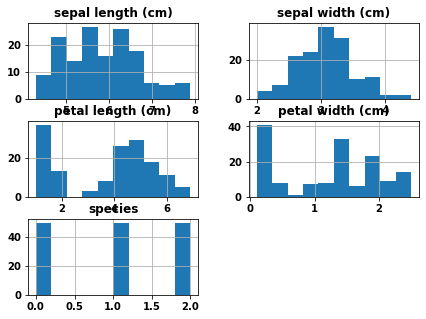

In [19]:
import matplotlib.pyplot as plt
iris.hist(figsize=(7,5))
plt.show()

#### Multivariate Plot

To see the interactions between attributes we use scatter plots. However, it's difficult to see if there's any grouping without any indication of the true species of the flower that a datapoint represents. Therefore, we define a color code for each species to differentiate species visually:



In [21]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

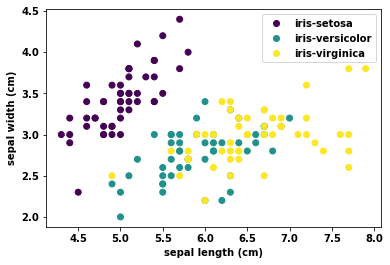

In [22]:
# build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0, 
  'iris-versicolor': 1,
  'iris-virginica': 2}

# build integer color code 0/1/2
colors = iris['species']
# scatter plot
scatter = plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

Using sepal_length and sepal_width features, we can distinguish iris-setosa from others; separating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints.


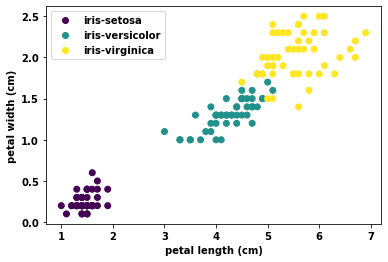

In [26]:
#Similarly, between petal length and width:
    
# scatter plot
scatter = plt.scatter(iris['petal length (cm)'], iris['petal width (cm)'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

Interestingly, the length and width of the petal are highly correlated, and these two features are very useful to identify various iris species. It is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, indicating the difficulties for some classifiers. It is worth keeping in mind when training to decide which features we should use.

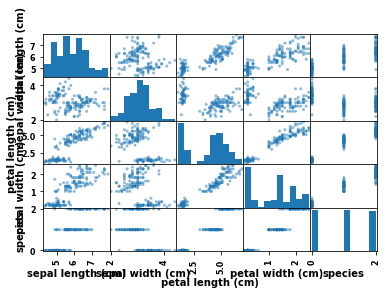

In [31]:
'''To see scatter plots of all pairs of features, use pandas.plotting.scatter_matrix().
Besides the histograms of individual variables along the diagonal,
it will show the scatter plots of all pairs of attributes to help spot structured relationships between features.'''
pd.plotting.scatter_matrix(iris[:-1])
plt.show()

#### K nearest neighbors

K nearest neighbors (knn) is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote.

Here we see that changing k could affect the output of the model. In knn, k is a hyperparameter. A hyperparameter in machine learning is a parameter whose value is set before the learning process begins. We will learn how to tune the hyperparameter later.

For example, in the figure below, there are two classes: blue squares and red triangles. What label should we assign to the green dot, with unknown label, based on the 3nn algorithm, i.e., when k is 3? Of the 3 closest data points from the green dot (solid line circle), two are red triangles and one is blue square, thus the green dot is predicted to be a red triangle. If k is 5 (dashed line circle), it is then classified as a blue square (3 blue squares versus 2 red triangles, blue squares are the majority).



In scikit-learn, the k nearest neighbors algorithm is implemented in sklearn.neighbors module:

In [32]:
from sklearn.neighbors import KNeighborsClassifier

K nearest neighbors can also be used for regression problems. The difference lies in prediction. Instead of a majority vote, knn for regression makes a prediction using the mean labels of the k closest data points.

### 5.3 Data Preparation

In [36]:
X = iris[['petal length (cm)', 'petal width (cm)']]
y = iris['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

'''
We use a 70-30 split, i.e., 70% of the data is for training and 30% for testing. Note that we specified the split was stratified by label (y). 
This is done to ensure that the distribution of labels remains similar in both train and test sets:'''

'\nWe use a 70-30 split, i.e., 70% of the data is for training and 30% for testing. Note that we specified the split was stratified by label (y). \nThis is done to ensure that the distribution of labels remains similar in both train and test sets:'

In [35]:
#y_train.value_counts()
y_test.value_counts()

2    15
1    15
0    15
Name: species, dtype: int64

#### Modeling

In [37]:
# Now we are ready to build and train the model knn. First we import the class of the model:
from sklearn.neighbors import KNeighborsClassifier

# Now create an instance knn from the class KNeighborsClassifier.
knn = KNeighborsClassifier(n_neighbors=5)

# Note that the only parameter we need to set in this problem is n_neighbors, or k as in knn. We set k to be 5 by random choice.

# Use the data X_train and y_train to train the model:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 5.4 Label Prediction

To make a prediction in scikit learn, we can call the method predict(). We are trying to predict the species of iris using given features in feature matrix X.
Let’s make the predictions on the test data set and save the output in pred for later review:


In [38]:
pred = knn.predict(X_test)

# Let’s review the first five predictions:
pred[:5]
# ['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor', 'iris-versicolor']


# Each prediction is a species of iris and stored in a 1darray.
# predict() returns an array of predicted class labels for the predictor data.


array([2, 0, 0, 1, 1])

#### Probability Prediction

Of all classification algorithms implemented in scikit learn, there is an additional method 'predict_prob'. Instead of splitting the label, it outputs the probability for the target in array form. Let’s take a look at what the predicted probabilities are for the 11th and 12th flowers:

In [39]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]


array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

For example, the probability of the 11th flower being predicted an iris-setosa is 1, an iris-versicolor and an iris-virginica are both 0. For the next flower, there is a 20% chance that it would be classified as iris-versicolor but 80% chance to be iris-virginica. What it tells us is that of the five nearest neighbours of the 12th flower in the testing set, 1 is an iris-versicolor, the rest 4 are iris-virginica. To see the corresponding predictions:

In [42]:
pred[10:12] # note you can give categorical values as y to the model

array([0, 2])

### 5.5 Model Evaluation

#### Accuracy

In classification the most straightforward metric is accuracy. It calculates the proportion of data points whose predicted labels exactly match the observed labels.

In [45]:
(pred==y_test.values).sum()
y_test.size

45

In [48]:
# The classifier made one mistake. Thus, the accuracy is 44/45:

(pred==y_test.values).sum()/y_test.size

# Same as:
knn.score(X_test, y_test)

# Under the module sklearn.metrics, function accuracy_score(y_true, y_pred) does the same calculation.

0.9777777777777777

#### Confusion Matrix

Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset. Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.

What is a confusion matrix? It is a summary of the counts of correct and incorrect predictions, broken down by each class.

In classifying the iris, we can use confusion_matrix() under module sklearn.metrics:

In [52]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, pred, labels=[0,1,2])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

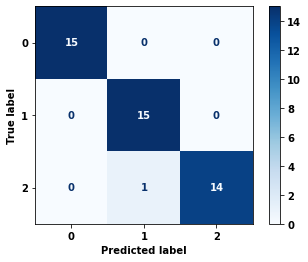

In [53]:
# We can visualize the confusion matrix:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);

Here we specified the labels in order. Each column of the matrix corresponds to a predicted class, and each row corresponds to an actual class. So the row sums up to the total number of instances of the class.

The first row corresponds to the actual iris-setosa; [15, 0, 0] indicates that 15 of iris-setosa are correctly predicted, and none are mislabeled; while the last row [0, 1, 14] suggests that of 15 actual iris-virginica, 0 were predicted as iris-setosa, 1 was predicted to be iris-versicolor, and the remaining 14 were correctly identified as iris-virginica. This is consistent with our observation during exploratory data analysis, that is, there was some overlap between the two species on the scatter plot and it is more difficult to distinguish iris-versicolor from iris-virginica than identifying iris-setosa.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

#### K-fold Cross Validation

Previously we made train-test split before fitting the model so that we can report the model performance on the test data. This is a simple kind of cross validation technique, also known as the holdout method. However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation.

In k fold cross validation, the data is divided into k subsets. Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model. Then the accuracy is averaged over k trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.

The simplest way to use k-fold cross-validation in scikit-learn is to call the cross_val_score function on the model and the dataset:

In [54]:
from sklearn.model_selection import cross_val_score
# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

# Note that now we are fitting a 3nn model.
# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#Each of the holdout set contains 20% of the original data.
# print each cv score (accuracy) 
print(cv_scores)
#  [0.96666667 0.96666667 0.93333333 0.96666667 1. ]

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [55]:
# As shown, due to the random assignments, the accuracies on the holdsets fluctuates from 0.9 to 1.

# then average them
cv_scores.mean()
# 0.9533333333333334

0.9533333333333334

We can not rely on one single train-test split, rather we report that the 3nn model has an accuracy of 95.33% based on
a 5-fold cross validation.

As a general rule, 5-fold or 10-fold cross validation is preferred; but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.

#### Grid Search

When we built our first knn model, we set the hyperparameter k to 5, and then to 3 later in k-fold cross validation; random choices really. What is the best k? Finding the optimal k is called tuning the hyperparameter. A handy tool is grid search. 

In scikit-learn, we use GridSearchCV, which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score, so that we can check which of our values for the tested hyperparameter performed the best.

In [57]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# create new a knn model
knn2 = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

# To check the top performing n_neighbors value:
knn_gscv.best_params_
# {'n_neighbors': 4}

{'n_neighbors': 4}

In [58]:
# We can see that 4 is the best value for n_neighbors. What is the accuracy of the model when k is 4?
knn_gscv.best_score_
# 0.9666666666666667

0.9666666666666668

In [60]:
# By using grid search to find the optimal hyperparameter for our model, it improves the model accuracy by over 1%.

# Now we are ready to build the final model:

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)
y_pred = knn_final.predict(X)
knn_final.score(X, y)
# 0.9733333333333334

# Note : The techniques of k-fold cross validation and tuning parameters 
#    with grid search is applicable to both classification and regression problems.

0.9733333333333334

### 5.6 Label Prediction with New Data

Now we are ready to deploy the model 'knn_final'. We take some measurements of an iris and record that the length and width of its sepal are 5.84 cm and 3.06 cm, respectively, and the length and width of its petal are 3.76 cm and 1.20 cm, respectively. How do we make a prediction using the built model?

Use model.predict. Since the model was trained on the length and width of petals, that’s the data we will need to make a prediction. Let’s put the petal length and petal width into a numpy array:

In [65]:
new_data = np.array([3.76, 1.20])

# If we feed it to the model:
# knn_final.predict(np.array(new_data))
# ValueError: Expected 2D array, got 1D array instead

# Wait, what just happened? When we trained the model, the data is 2D DataFrame, so the model was expecting a 2D array, which could be numpy array or pandas DataFrame. Now new_data is a 1D array, we need to make it 2D as the error message suggested:
new_data = new_data.reshape(1, -1)

# Now we are ready to make a label prediction:
knn_final.predict(new_data)

# 1 means ['iris-versicolor']

# Model.predict can also take a 2D list. For example, knn_final.predict([[3.76, 1.2]]) 
# will output the same result as shown in the lesson.

array([1])

#### Probability Prediction with New Data

Let's collect more data: three plants of iris share the same petal width, 2.25cm, but are different in the length of the petal: 5.03 cm, 3.85 cm, and 1.77 cm, respectively. We store the new data into a 2D array as follows:

In [67]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])

# We learned from the previous part that we can make predictions using knn_final.predict():
knn_final.predict(new_data)

# Recall that in classifications, it is more common to predict the probability of each data point being assigned to each label:
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

##### Extra info

Machine Learning
1. Supervised Learning
      a) Regression 
          i) Linear Regression
          ii) Polynomial Regression
          iii) Decision Tree Regression
          iv) Random Forest Regression
      b) Classification
          i) Logistic Regression
          ii) K-nearest neighbors
          iii) Support Vector Machines (SVM)
          iv) Naive Bayes Classifier
          v) Kernel SVM
2. Unsupervised Learning
      a) Clustering
           i) k-means clustering
           ii) Hierarchical clustering
           iii) Density-based clustering
           iv) Fuzzy clustering
        b) Dimensionality Reduction
            i) Principle Component Analysis
            ii) Kernel Principle Component Analysis
3. Semi-supervised Learning
4. Reinforcement Learning